# D´alambert
La estrategia de D'Alembert está fundamentada en el principio del equilibrio, también conocido como la "ley del equilibrio" en la teoría de probabilidades. Este principio fue sugerido por el matemático Jean le Rond D'Alembert, quien postulaba que, a largo plazo, todos los eventos tendrán la misma frecuencia de ocurrencia. En el contexto de la ruleta o cualquier juego de apuestas con dos resultados posibles aproximadamente equiprobables, este principio sugiere que las pérdidas y ganancias se equilibrarán con el tiempo.

**Fundamento Teórico:**
- **Principio de Equilibrio:** La suposición de D'Alembert es que, por cada pérdida que ocurre, una ganancia es inminente para equilibrar el resultado a largo plazo. Este principio, aunque intuitivamente atractivo, no se sostiene en la teoría de probabilidades moderna, dado que cada giro de la ruleta es un evento independiente. Las probabilidades de rojo o negro, por ejemplo, no cambian independientemente de los resultados anteriores. Esto es lo que se conoce como la falacia del jugador.

**Fórmulas:**
La estrategia de D'Alembert se puede describir utilizando un enfoque matemático simple basado en incrementar o disminuir la apuesta linealmente. Las fórmulas son:

1. **Si pierdes una apuesta:** Aumentas la apuesta en una unidad fija.
   
   \[ A_{n+1} = A_n + 1 \]

   Donde \( A_n \) es la apuesta actual y \( A_{n+1} \) es la apuesta después de una pérdida.

2. **Si ganas una apuesta:** Disminuyes la apuesta en una unidad fija, siempre que no sea menor que la apuesta inicial.
   
   \[ A_{n+1} = A_n - 1 \]

   Sin embargo, es importante mantener la apuesta \( A_{n+1} \geq 1 \), donde 1 es la unidad de apuesta inicial establecida.

**Implementación Teórica:**
- Se inicia con una apuesta base o inicial, \( A_0 \).
- Después de cada pérdida, se incrementa la apuesta en una unidad.
- Después de cada ganancia, y siempre que la apuesta sea mayor que la apuesta inicial, se reduce en una unidad.
- La secuencia de apuestas continuará ajustándose basada en los resultados ganados o perdidos, con la esperanza de que las ganancias equilibren o superen a las pérdidas durante una sesión.

Es crucial recordar que esta estrategia, al igual que cualquier sistema de apuestas en juegos de azar, no supera la ventaja matemática de la casa. Cada giro en la ruleta es independiente, y las probabilidades no cambian basadas en acciones pasadas. Por lo tanto, mientras que la estrategia puede ayudar a gestionar un bankroll en el corto plazo, no garantiza éxito a largo plazo y debe usarse con precaución y dentro de los límites de juego responsable.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from estrategia import Estrategia

In [74]:
cantidad_tiradas = 10000
apuesta_inicial = 500
capital = 100000000
es_capital_infinito = False
capital = 10000
capital_a_apostar = capital

In [75]:
rojo = [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]

In [76]:
 

def dalambert(listado_apuestas,is_win):
    """
    Implementa un sistema de apuestas basado en la estrategia de D'alambert.
    
    Si la apuesta es ganadora, entonces se dismunye la cantidad apostada en una unidad
    SI la apuesta es perdedora, se aumenta la cantidad apostada en una unidad

    Parameters:
    listado_apuestas (list): Lista que contiene los montos de las apuestas previas.
    is_win (bool): Indica si la última apuesta fue ganadora (True) o perdedora (False).

    Returns:
    int: El monto de la próxima apuesta según la estrategia Fibonacci.
    """

    global capital, apuesta_inicial
    ultima_apuesta = listado_apuestas[-1]
    unidad = apuesta_inicial 
    if is_win:
        capital += ultima_apuesta
        proxima_apuesta = max(ultima_apuesta - unidad, unidad)  # Evitar apuestas menores que la unidad inicial
    else:
        capital -= ultima_apuesta
        proxima_apuesta = ultima_apuesta + unidad

    return proxima_apuesta


In [77]:
tiradas = np.random.randint(0,37,size=[cantidad_tiradas])

In [78]:
listado_apuestas = []
listado_capital = []
listado_wins = []
listado_unidades = []

In [79]:
listado_apuestas.append(apuesta_inicial)
listado_capital.append(capital)
listado_unidades.append(1)

# for index, tirada in enumerate(tiradas):
tirada = 0


condicion = capital > 0 if not es_capital_infinito else tirada < cantidad_tiradas
 
  
while True:  
    tirada += 1
    numero_al_girar_ruleta = np.random.randint(0,37)
    is_win = numero_al_girar_ruleta in rojo
    listado_wins.append(is_win)

    proxima_apuesta = dalambert(listado_apuestas, is_win)

    if not es_capital_infinito and proxima_apuesta > capital: # banca rota
        break

    if es_capital_infinito and len(listado_apuestas)+1 == cantidad_tiradas:
        break

    listado_unidades.append(listado_unidades[-1] +1 if is_win else listado_unidades[-1] -1 )
    # listado_unidades.append( sum(listado_unidades) +1 if is_win else sum(listado_unidades) -1 )
    listado_apuestas.append(proxima_apuesta)
    listado_capital.append(capital)



In [80]:
print(len(listado_apuestas))
print(len(listado_wins))
print(len(listado_capital))

37
37
37


In [81]:
df = pd.DataFrame({
    'apuesta': listado_apuestas,
    'win': listado_wins,
    'capital': listado_capital,
    'balance': listado_unidades
})

df.head(len(listado_apuestas))
# df.head(100)

,apuesta,win,capital,balance
0,500,False,10000,1
1,1000,False,9500,0
2,1500,False,8500,-1
3,2000,True,7000,-2
4,1500,False,9000,-1
5,2000,False,7500,-2
6,2500,True,5500,-3
7,2000,False,8000,-2
8,2500,True,6000,-3
9,2000,True,8500,-2


In [82]:
def grafico_flujo_caja(listado_capital):
    global cantidad_tiradas
    # Crear un gráfico con dos ejes Y
    fig, ax1 = plt.subplots(figsize=(30, 10))

    # Configuración del primer eje Y para el capital
    color = 'tab:blue'
    ax1.set_xlabel('Número de Tiradas')
    ax1.set_ylabel('Capital Total', color=color)
    ax1.plot(listado_capital, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Crear un segundo eje Y para la cantidad apostada
    ax2 = ax1.twinx()  # Instancia un segundo eje que comparte el mismo eje X
    color = 'tab:red'
    ax2.set_ylabel('Cantidad Apostada', color=color)
    ax2.plot(listado_apuestas, color=color, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

    # Título y otras configuraciones
    plt.title('Progreso del Capital y Cantidad Apostada Usando la Estrategia de D\'Alembert')
    fig.tight_layout()  # Ajusta el layout para evitar solapamientos

    # Mostrar el gráfico
plt.show()


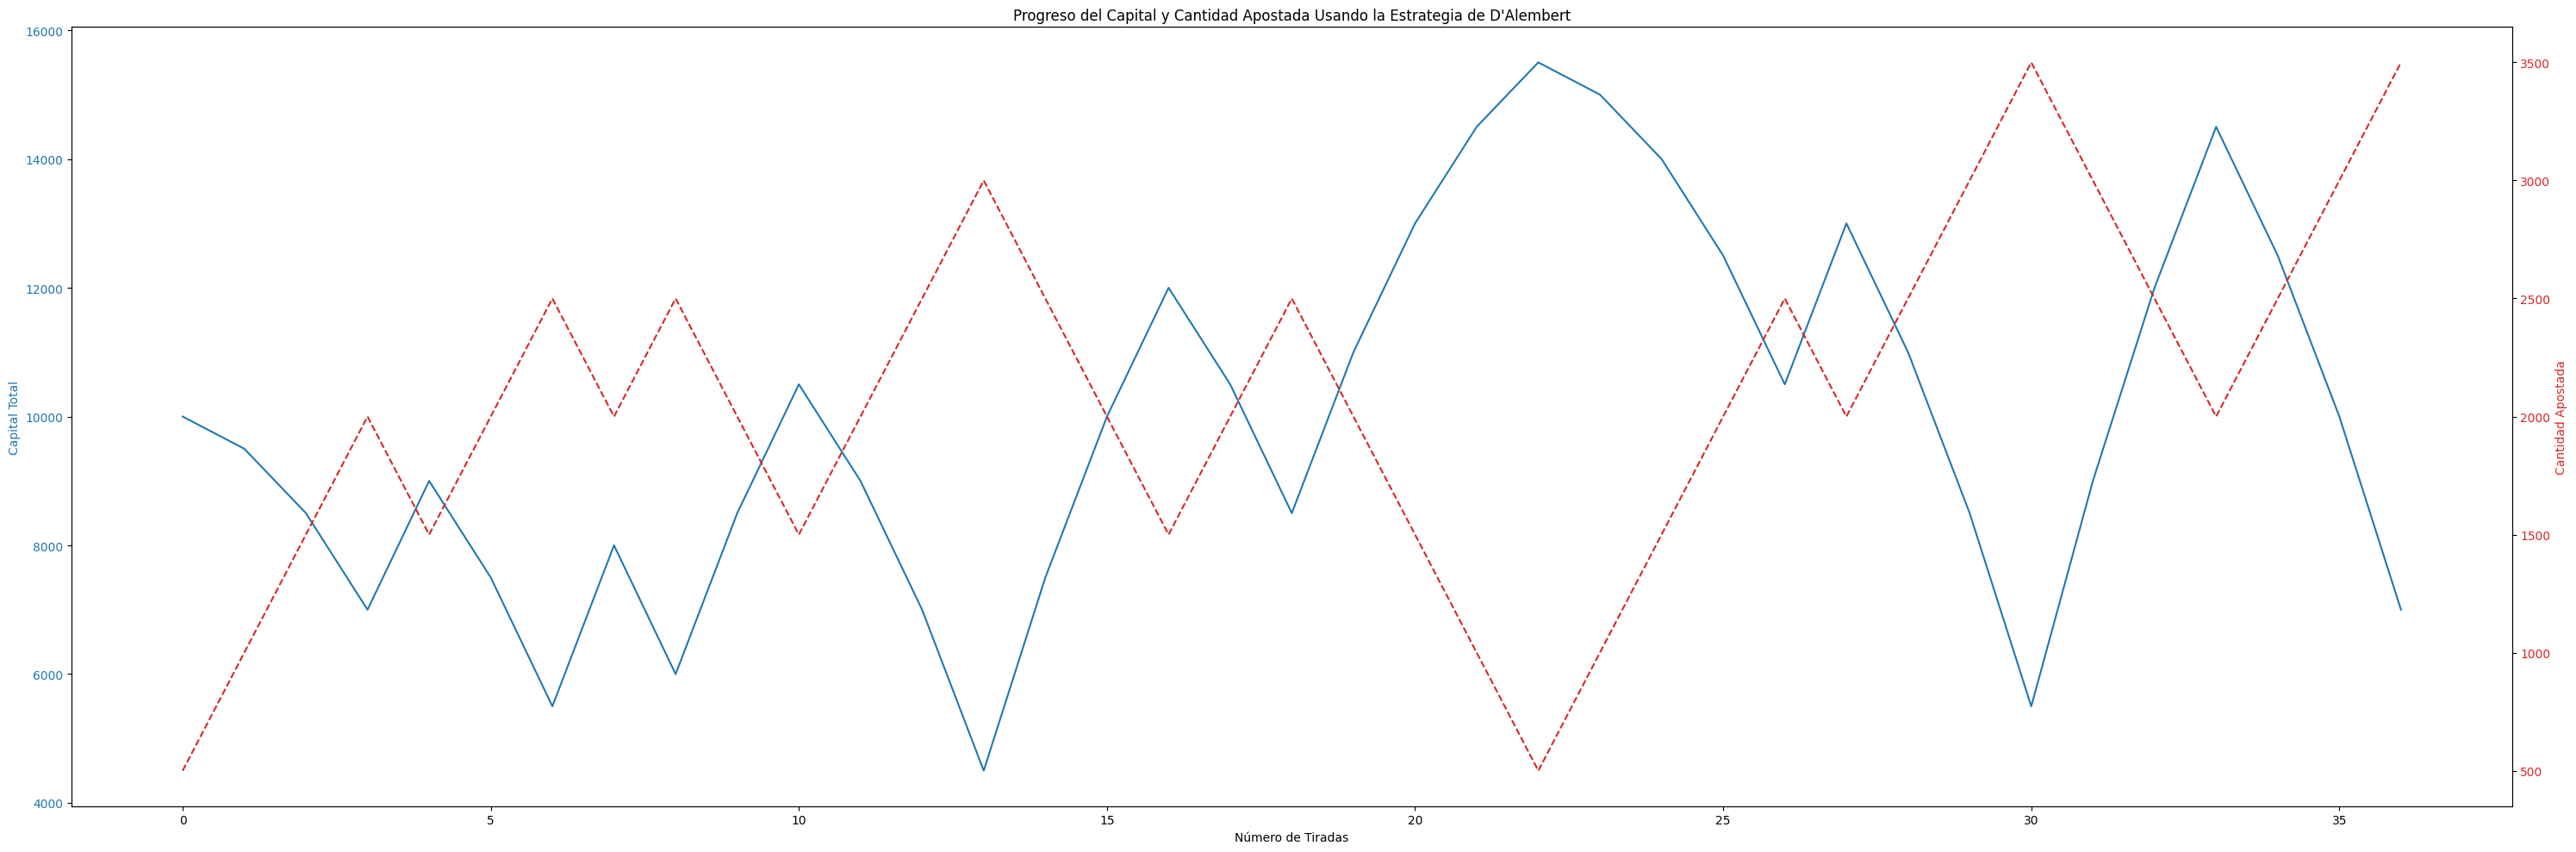

In [83]:
grafico_flujo_caja(listado_capital)

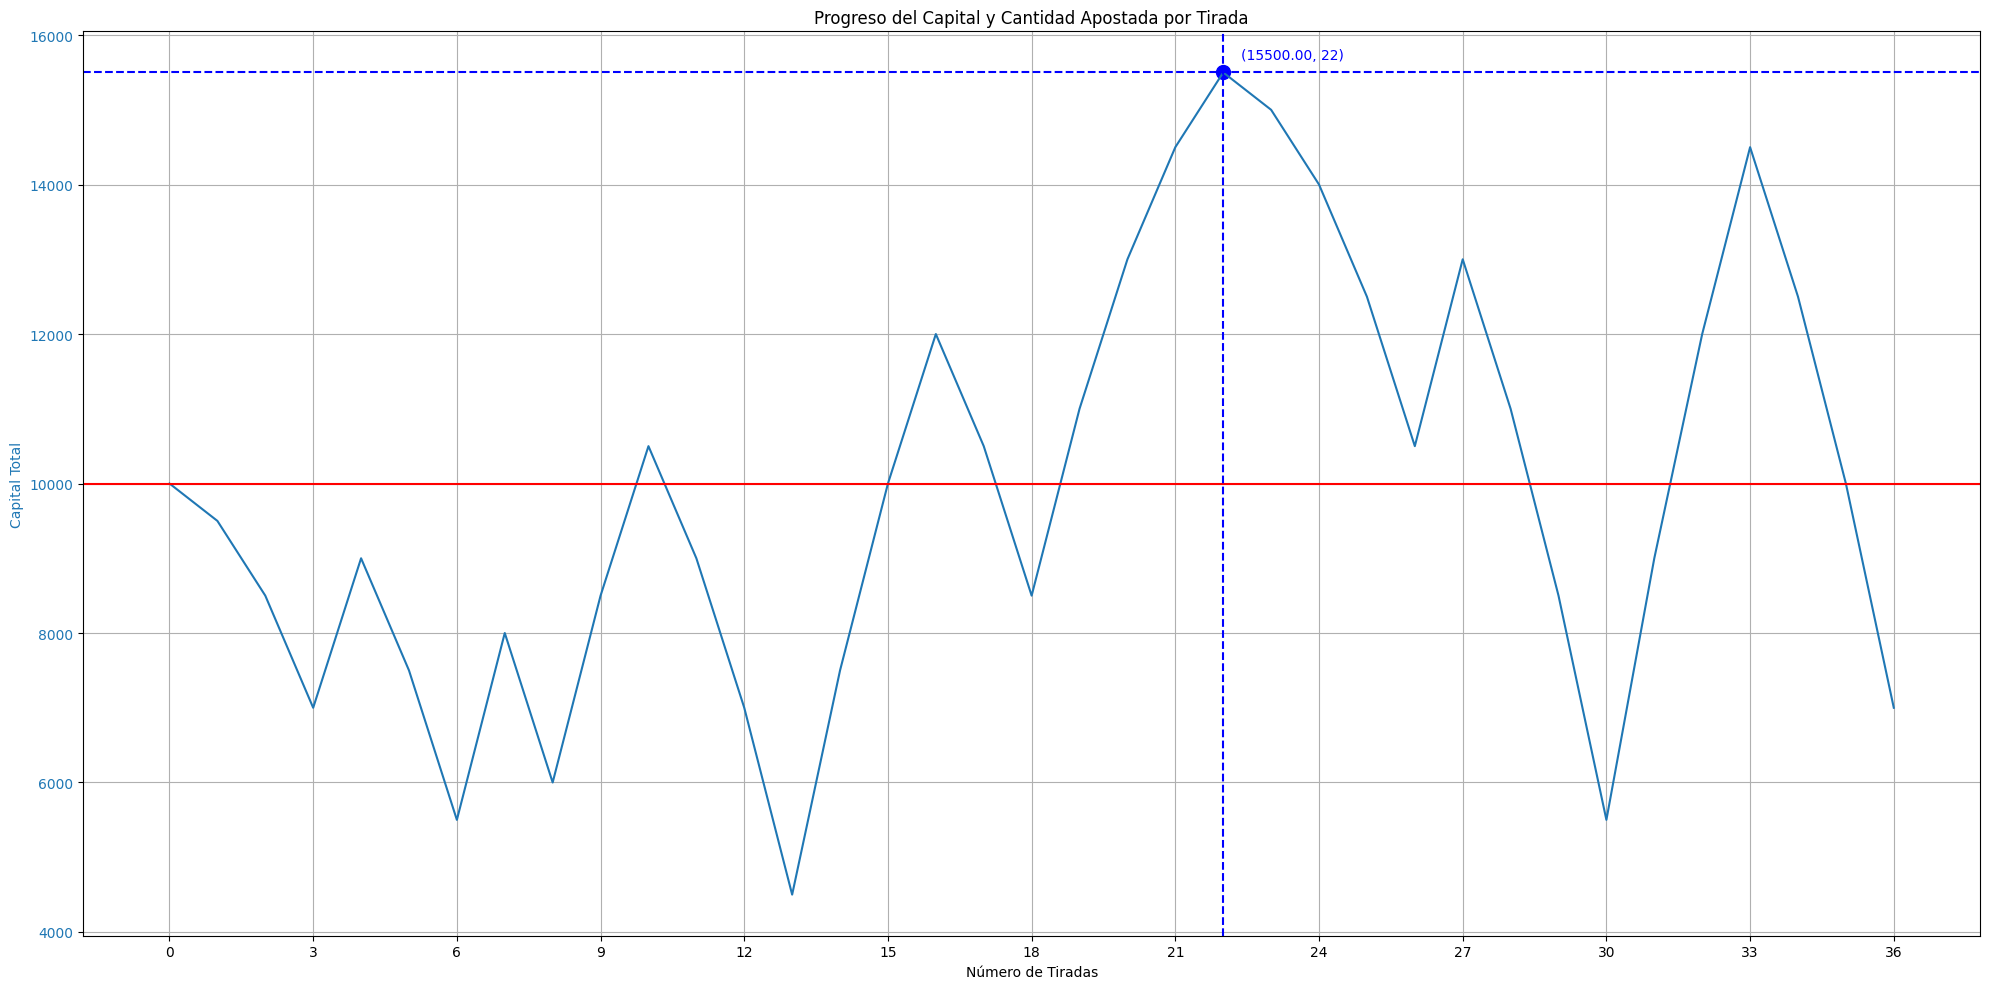

In [84]:
 

# Asumiendo que listado_capital, listado_apuestas, listado_wins y tiradas están definidos.

# Crear un gráfico con dos ejes Y
fig, ax1 = plt.subplots(figsize=(20, 10))

# Configuración del primer eje Y para el capital
color = 'tab:blue'
ax1.set_xlabel('Número de Tiradas')
ax1.set_ylabel('Capital Total', color=color)
ax1.plot(listado_capital, label='Capital Total', color=color)
ax1.axhline(y=capital_a_apostar, color='r', linestyle='-', label='Capital total')

# Ganancia maxima
max_value =max(listado_capital)
max_index = listado_capital.index(max_value)
ax1.axvline(x=max_index, color='b', linestyle='--', label='Ganancia máxima')
ax1.axhline(y=max_value, color='b', linestyle='--')
ax1.scatter([max_index], [max_value], color='b', s=100)
ax1.annotate(f'({max_value:.2f}, {max_index})', 
             (max_index, max_value), 
             textcoords="offset points", 
             xytext=(50,10), 
             color="b",
             ha='center')

# ax1.ax()
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Configuración de ticks del eje X cada 10 tiradas
ticks = np.arange(0, len(listado_capital),int(len(listado_capital)/10))
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks)

# Crear un segundo eje Y para la cantidad apostada
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cantidad Apostada', color=color)
ax2.plot(listado_apuestas, label='Cantidad Apostada', color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Añadir información de victorias/derrotas
wins_array = np.array(listado_wins)
x_coords = np.arange(len(wins_array))
# Marcadores para victorias y derrotas
ax2.scatter(x_coords[wins_array], np.array(listado_apuestas)[wins_array], color='green', label='Ganada', marker='^')
ax2.scatter(x_coords[~wins_array], np.array(listado_apuestas)[~wins_array], color='black', label='Perdida', marker='v')

# Leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Título y ajustes finales
plt.title('Progreso del Capital y Cantidad Apostada por Tirada')
fig.tight_layout()

# Mostrar el gráfico
plt.show()


#### FALTA
https://www.youtube.com/watch?v=nlpgaznodcA&ab_channel=Lametodologíadefinitiva
https://www.youtube.com/watch?v=DfpcVzS61HM&ab_channel=Lametodologíadefinitiva
https://www.youtube.com/watch?v=Kzc2GgfAxkk&t=242s&ab_channel=Lametodologíadefinitiva

* Lo del capital infinito, hacerlo que corte por cantidad de tiradas con un capital incial (el tipo se enduda basicamente)
* Calcular la frecuencia relativa de apuestas favorables
* Grafico sobre el balance de unidades


## CONCLU
* Explicar que se visualiza que se da siempre la bancorrota
* Realizar 10 o mas ejecuciones, que esas 10 ejecuciones muestren el capital max con el numero de tiradas al que llego al cap max, el numero de tiradas en llegar a bancarrot
